# ⚾ UNDERVALUED GEMS SCOUT
## Exploratory Data Analysis (EDA)

<img src="https://img.icons8.com/color/96/000000/baseball.png" align="left" width="80" style="margin-right: 20px;"/>

**Objective:** Understand the structure, patterns, and quality of baseball data before applying machine learning models.

**Dataset:** Combined Lahman Database + FanGraphs statistics (2015-2025)

**Key Questions:**
- What is the distribution of key metrics (WAR, salary, wOBA, BABIP)?
- Are there correlations between different performance indicators?
- How are players distributed across teams and years?
- What patterns suggest undervalued players?

**Author:** Moneyball Analytics
**Date:** 2026

In [4]:
# =============================================================================
# IMPORT LIBRARIES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import warnings
warnings.filterwarnings('ignore')

# Configure visual style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

print("✅ Libraries imported successfully")
print(f"   Pandas version: {pd.__version__}")
print(f"   NumPy version: {np.__version__}")
print(f"   Matplotlib version: {plt.matplotlib.__version__}")
print(f"   Seaborn version: {sns.__version__}")

✅ Libraries imported successfully
   Pandas version: 2.2.2
   NumPy version: 2.4.2
   Matplotlib version: 3.10.8
   Seaborn version: 0.13.2


In [6]:
# =============================================================================
# LOAD DATA
# =============================================================================

# Try multiple possible paths
possible_paths = [
    '../data/analysis/players_2025_analysis.csv',
    '../data/analysis/all_players_with_clusters.csv',
    '../data/top_undervalued_2025.csv',
    '../data/cleaned_undervalued_data.csv',
    '../../data/analysis/players_2025_analysis.csv'
]

df = None
for path in possible_paths:
    if os.path.exists(path):
        df = pd.read_csv(path)
        print(f"✅ Data loaded successfully!")
        print(f"   📁 Path: {path}")
        print(f"   📊 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
        break

if df is None:
    print("❌ ERROR: No data file found!")
    print("   Please run data_loader.py and data_cleaner.py first.")

✅ Data loaded successfully!
   📁 Path: ../data/analysis/players_2025_analysis.csv
   📊 Shape: 452 rows × 14 columns


In [7]:
# =============================================================================
# INITIAL DATA OVERVIEW
# =============================================================================

print("="*60)
print("FIRST 5 ROWS")
print("="*60)
display(df.head())

print("\n" + "="*60)
print("LAST 5 ROWS")
print("="*60)
display(df.tail())

FIRST 5 ROWS


,playerID,Name,yearID,WAR,salary,BABIP,wOBA,ISO,K%,cluster,distance_to_centroid,similarity_score,trend_score,composite_score
0,pagesan01,Andy Pages,2025,4.100,0.000,0.308,0.332,0.189,0.216,0,0.149,91.186,5.000,68.774
1,mckinza01,Zach McKinstry,2025,3.200,0.000,0.314,0.333,0.179,0.217,0,0.126,97.326,5.000,68.530
2,langfwy01,Wyatt Langford,2025,4.100,0.000,0.299,0.337,0.190,0.264,0,0.155,89.756,5.000,68.203
3,duranja01,Jarren Duran,2025,3.900,0.000,0.326,0.335,0.185,0.243,0,0.153,90.206,5.000,67.783
4,croneja01,Jake Cronenworth,2025,2.900,0.000,0.299,0.333,0.131,0.208,0,0.126,97.332,5.000,67.633



LAST 5 ROWS


,playerID,Name,yearID,WAR,salary,BABIP,wOBA,ISO,K%,cluster,distance_to_centroid,similarity_score,trend_score,composite_score
447,estrath01,Thairo Estrada,2025,0.000,0.000,0.000,0.000,0.000,0.000,1,0.490,0.000,-5.000,0.000
448,francty01,Ty France,2025,0.000,0.000,0.000,0.000,0.000,0.000,1,0.490,0.000,-5.000,0.000
449,thomala02,Lane Thomas,2025,0.000,0.000,0.000,0.000,0.000,0.000,1,0.490,0.000,-5.000,0.000
450,tovarez01,Ezequiel Tovar,2025,0.000,0.000,0.000,0.000,0.000,0.000,1,0.490,0.000,-5.000,0.000
451,turneju01,Justin Turner,2025,0.000,0.000,0.000,0.000,0.000,0.000,1,0.490,0.000,-5.000,0.000


In [8]:
# =============================================================================
# DATASET INFORMATION
# =============================================================================

print("="*60)
print("DATASET INFO")
print("="*60)

# Basic info
print(f"\n📊 Total records: {len(df):,}")
print(f"📋 Total columns: {len(df.columns)}")

# Data types
print("\n📋 Column data types:")
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"   • {dtype}: {count} columns")

# Memory usage
memory_mb = df.memory_usage(deep=True).sum() / 1024 / 1024
print(f"\n💾 Memory usage: {memory_mb:.2f} MB")

DATASET INFO

📊 Total records: 452
📋 Total columns: 14

📋 Column data types:
   • float64: 10 columns
   • object: 2 columns
   • int64: 2 columns

💾 Memory usage: 0.10 MB


In [9]:
# =============================================================================
# COLUMN DETAILS
# =============================================================================

print("="*60)
print("COLUMN DETAILS")
print("="*60)

# Create column info dataframe
col_info = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Non-Null': df.count().values,
    'Null %': (df.isnull().sum().values / len(df) * 100).round(2)
})

# Add sample values
sample_values = []
for col in df.columns:
    sample = df[col].dropna().iloc[0] if len(df[col].dropna()) > 0 else 'N/A'
    if isinstance(sample, float):
        sample = f"{sample:.3f}"
    sample_values.append(str(sample)[:50])

col_info['Sample Value'] = sample_values

display(col_info)

COLUMN DETAILS


,Column,Data Type,Non-Null,Null %,Sample Value
0,playerID,object,452,0.000,pagesan01
1,Name,object,452,0.000,Andy Pages
2,yearID,int64,452,0.000,2025
3,WAR,float64,452,0.000,4.100
4,salary,float64,452,0.000,0.000
5,BABIP,float64,452,0.000,0.308
6,wOBA,float64,452,0.000,0.332
7,ISO,float64,452,0.000,0.189
8,K%,float64,452,0.000,0.216
9,cluster,int64,452,0.000,0


In [10]:
# =============================================================================
# STATISTICAL SUMMARY
# =============================================================================

print("="*60)
print("STATISTICAL SUMMARY")
print("="*60)

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\n🔢 Numeric columns ({len(numeric_cols)}): {numeric_cols}\n")

# Calculate statistics
stats = df[numeric_cols].describe().T
stats['range'] = stats['max'] - stats['min']
stats['cv'] = (stats['std'] / stats['mean']).round(3)  # Coefficient of variation
stats['skew'] = df[numeric_cols].skew().round(3)
stats['kurtosis'] = df[numeric_cols].kurtosis().round(3)

# Reorder columns
stats = stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'range', 'cv', 'skew', 'kurtosis']]

display(stats.round(3))

STATISTICAL SUMMARY

🔢 Numeric columns (12): ['yearID', 'WAR', 'salary', 'BABIP', 'wOBA', 'ISO', 'K%', 'cluster', 'distance_to_centroid', 'similarity_score', 'trend_score', 'composite_score']



,count,mean,std,min,25%,50%,75%,max,range,cv,skew,kurtosis
yearID,452.000,2025.000,0.000,2025.000,2025.000,2025.000,2025.000,2025.000,0.000,0.000,0.000,0.000
WAR,452.000,0.894,1.672,-0.600,0.000,0.000,1.300,10.100,10.700,1.871,2.070,4.516
salary,452.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000
BABIP,452.000,0.094,0.138,0.000,0.000,0.000,0.272,0.376,0.376,1.480,0.830,-1.261
wOBA,452.000,0.105,0.155,0.000,0.000,0.000,0.309,0.463,0.463,1.480,0.831,-1.254
ISO,452.000,0.056,0.089,0.000,0.000,0.000,0.131,0.357,0.357,1.572,1.216,0.139
K%,452.000,0.066,0.102,0.000,0.000,0.000,0.158,0.323,0.323,1.553,1.086,-0.492
cluster,452.000,0.684,0.466,0.000,0.000,1.000,1.000,1.000,1.000,0.681,-0.792,-1.378
distance_to_centroid,452.000,0.391,0.148,0.116,0.207,0.490,0.490,0.490,0.374,0.378,-0.864,-1.188
similarity_score,452.000,26.479,39.540,0.000,0.000,0.000,75.774,100.000,100.000,1.493,0.864,-1.188


In [11]:
# =============================================================================
# MISSING VALUES ANALYSIS
# =============================================================================

print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Missing %': missing_pct.values.round(2)
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing %', ascending=False)

if len(missing_df) > 0:
    print(f"\n⚠️ Found {len(missing_df)} columns with missing values:\n")
    display(missing_df)

    # Visualize missing values
    fig, ax = plt.subplots(figsize=(12, 6))
    missing_plot = missing_df.set_index('Column')['Missing %'].plot(kind='barh', color='#ff6b6b', ax=ax)
    ax.set_xlabel('Missing Percentage (%)')
    ax.set_title('Missing Values by Column', fontsize=14, pad=20)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No missing values found!")

MISSING VALUES ANALYSIS

✅ No missing values found!


In [12]:
# =============================================================================
# YEAR DISTRIBUTION ANALYSIS
# =============================================================================

print("="*60)
print("YEAR DISTRIBUTION ANALYSIS")
print("="*60)

# Find year column
year_col = None
for col in ['yearID', 'Year', 'year']:
    if col in df.columns:
        year_col = col
        break

if year_col:
    year_counts = df[year_col].value_counts().sort_index()

    print(f"\n📅 Year column found: '{year_col}'")
    print(f"📊 Years covered: {year_counts.index.min()} to {year_counts.index.max()}")
    print(f"📈 Total seasons: {len(year_counts)}")
    print(f"👥 Avg players per year: {year_counts.mean():.0f}")

    # Create visualization
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=['Players by Year', 'Year Distribution Box Plot'],
        specs=[[{'type': 'bar'}, {'type': 'box'}]]
    )

    # Bar chart
    fig.add_trace(
        go.Bar(
            x=year_counts.index,
            y=year_counts.values,
            marker_color='#4ecdc4',
            name='Players'
        ),
        row=1, col=1
    )

    # Box plot
    fig.add_trace(
        go.Box(
            y=year_counts.values,
            name='Distribution',
            marker_color='#4ecdc4',
            boxmean='sd'
        ),
        row=1, col=2
    )

    fig.update_layout(
        title_text='Year Distribution Analysis',
        height=500,
        showlegend=False
    )
    fig.update_xaxes(title_text='Year', row=1, col=1)
    fig.update_yaxes(title_text='Number of Players', row=1, col=1)

    fig.show()

    # Print year details
    print("\n📋 Year details:")
    year_details = pd.DataFrame({
        'Year': year_counts.index,
        'Players': year_counts.values,
        'Cumulative %': (year_counts.cumsum() / year_counts.sum() * 100).round(1)
    })
    display(year_details)

else:
    print("❌ No year column found in dataset")

YEAR DISTRIBUTION ANALYSIS

📅 Year column found: 'yearID'
📊 Years covered: 2025 to 2025
📈 Total seasons: 1
👥 Avg players per year: 452



📋 Year details:


,Year,Players,Cumulative %
yearID,,,
2025,2025,452,100.000


In [13]:
# =============================================================================
# WAR ANALYSIS
# =============================================================================

print("="*60)
print("WAR (Wins Above Replacement) ANALYSIS")
print("="*60)

if 'WAR' in df.columns:
    war_stats = df['WAR'].describe()

    print(f"\n📊 WAR Statistics:")
    print(f"   • Mean: {war_stats['mean']:.2f}")
    print(f"   • Median: {war_stats['50%']:.2f}")
    print(f"   • Std Dev: {war_stats['std']:.2f}")
    print(f"   • Range: {war_stats['min']:.2f} to {war_stats['max']:.2f}")
    print(f"   • Players with WAR > 5: {(df['WAR'] > 5).sum():,} ({(df['WAR'] > 5).mean()*100:.1f}%)")
    print(f"   • Players with WAR < 0: {(df['WAR'] < 0).sum():,} ({(df['WAR'] < 0).mean()*100:.1f}%)")

    # Create visualizations
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=['WAR Distribution', 'Top 20 Players by WAR'],
        specs=[[{'type': 'histogram'}, {'type': 'bar'}]]
    )

    # Histogram
    fig.add_trace(
        go.Histogram(
            x=df['WAR'],
            nbinsx=50,
            marker_color='#4ecdc4',
            name='Distribution'
        ),
        row=1, col=1
    )

    # Top 20
    top20 = df.nlargest(20, 'WAR')
    fig.add_trace(
        go.Bar(
            x=top20['Name'] if 'Name' in top20.columns else [f"Player {i}" for i in range(20)],
            y=top20['WAR'],
            marker_color='#4ecdc4',
            name='Top Players'
        ),
        row=1, col=2
    )

    fig.update_layout(
        title_text='WAR Analysis',
        height=600,
        showlegend=False
    )
    fig.update_xaxes(tickangle=45, row=1, col=2)
    fig.update_xaxes(title_text='WAR', row=1, col=1)
    fig.update_yaxes(title_text='Count', row=1, col=1)
    fig.update_yaxes(title_text='WAR', row=1, col=2)

    fig.show()

    # Display top players
    print("\n🏆 Top 10 Players by WAR:")
    top10_cols = ['Name', 'yearID', 'teamID', 'WAR'] if all(col in df.columns for col in ['Name', 'yearID', 'teamID']) else ['WAR']
    display(df.nlargest(10, 'WAR')[top10_cols])

else:
    print("❌ WAR column not found in dataset")

WAR (Wins Above Replacement) ANALYSIS

📊 WAR Statistics:
   • Mean: 0.89
   • Median: 0.00
   • Std Dev: 1.67
   • Range: -0.60 to 10.10
   • Players with WAR > 5: 13 (2.9%)
   • Players with WAR < 0: 6 (1.3%)



🏆 Top 10 Players by WAR:


,WAR
80,10.100
65,9.100
64,7.500
15,7.100
26,6.700
36,6.500
23,6.300
29,6.300
98,5.800
73,5.700


In [14]:
# =============================================================================
# SALARY ANALYSIS
# =============================================================================

print("="*60)
print("SALARY ANALYSIS")
print("="*60)

if 'salary' in df.columns:
    salary_stats = df['salary'].describe()

    print(f"\n💰 Salary Statistics (Millions $):")
    print(f"   • Mean: ${salary_stats['mean']:.2f}M")
    print(f"   • Median: ${salary_stats['50%']:.2f}M")
    print(f"   • Std Dev: ${salary_stats['std']:.2f}M")
    print(f"   • Range: ${salary_stats['min']:.2f}M to ${salary_stats['max']:.2f}M")
    print(f"   • Players with $0 salary: {(df['salary'] == 0).sum():,} ({(df['salary'] == 0).mean()*100:.1f}%)")

    # Create visualizations
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=['Salary Distribution', 'Salary Box Plot'],
        specs=[[{'type': 'histogram'}, {'type': 'box'}]]
    )

    # Histogram (zoom to reasonable range)
    salary_zoom = df[df['salary'] < 10]['salary']

    fig.add_trace(
        go.Histogram(
            x=salary_zoom,
            nbinsx=50,
            marker_color='#4ecdc4',
            name='Distribution'
        ),
        row=1, col=1
    )

    # Box plot
    fig.add_trace(
        go.Box(
            y=df['salary'],
            name='Salary',
            marker_color='#4ecdc4',
            boxmean='sd'
        ),
        row=1, col=2
    )

    fig.update_layout(
        title_text='Salary Analysis (Salary < $10M zoom)',
        height=500,
        showlegend=False
    )
    fig.update_xaxes(title_text='Salary ($M)', row=1, col=1)
    fig.update_yaxes(title_text='Count', row=1, col=1)
    fig.update_yaxes(title_text='Salary ($M)', row=1, col=2)

    fig.show()

    # Players with zero salary (rookies/prospects)
    if 'Name' in df.columns:
        print("\n🌟 Top Rookies/Prospects (Salary = $0):")
        zero_salary = df[df['salary'] == 0].nlargest(10, 'WAR')
        display(zero_salary[['Name', 'yearID', 'teamID', 'WAR', 'wOBA'] if all(col in df.columns for col in ['Name', 'yearID', 'teamID', 'wOBA']) else ['WAR']])

else:
    print("❌ Salary column not found in dataset")

SALARY ANALYSIS

💰 Salary Statistics (Millions $):
   • Mean: $0.00M
   • Median: $0.00M
   • Std Dev: $0.00M
   • Range: $0.00M to $0.00M
   • Players with $0 salary: 452 (100.0%)



🌟 Top Rookies/Prospects (Salary = $0):


,WAR
80,10.100
65,9.100
64,7.500
15,7.100
26,6.700
36,6.500
23,6.300
29,6.300
98,5.800
73,5.700


In [15]:
# =============================================================================
# ADVANCED METRICS ANALYSIS
# =============================================================================

print("="*60)
print("ADVANCED METRICS ANALYSIS")
print("="*60)

advanced_metrics = ['wOBA', 'BABIP', 'ISO', 'K%']
available_advanced = [m for m in advanced_metrics if m in df.columns]

if available_advanced:
    print(f"\n📊 Available advanced metrics: {available_advanced}")

    # Create subplots for each metric
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=available_advanced[:4],
        horizontal_spacing=0.15,
        vertical_spacing=0.2
    )

    for i, metric in enumerate(available_advanced[:4]):
        row = i // 2 + 1
        col = i % 2 + 1

        fig.add_trace(
            go.Histogram(
                x=df[metric],
                nbinsx=40,
                marker_color='#4ecdc4',
                name=metric
            ),
            row=row, col=col
        )

        # Add mean line
        mean_val = df[metric].mean()
        fig.add_vline(
            x=mean_val,
            line_dash="dash",
            line_color="red",
            row=row, col=col
        )

    fig.update_layout(
        title_text='Advanced Metrics Distributions (red line = mean)',
        height=600,
        showlegend=False
    )

    fig.show()

    # Summary statistics
    print("\n📋 Advanced Metrics Summary:")
    adv_stats = df[available_advanced].describe().T
    adv_stats['range'] = adv_stats['max'] - adv_stats['min']
    display(adv_stats[['mean', 'std', 'min', 'max', 'range']].round(3))

else:
    print("❌ No advanced metrics found in dataset")

ADVANCED METRICS ANALYSIS

📊 Available advanced metrics: ['wOBA', 'BABIP', 'ISO', 'K%']



📋 Advanced Metrics Summary:


,mean,std,min,max,range
wOBA,0.105,0.155,0.000,0.463,0.463
BABIP,0.094,0.138,0.000,0.376,0.376
ISO,0.056,0.089,0.000,0.357,0.357
K%,0.066,0.102,0.000,0.323,0.323


CORRELATION ANALYSIS

📊 Analyzing correlations between: ['WAR', 'salary', 'wOBA', 'BABIP', 'ISO', 'K%', 'similarity_score', 'composite_score']


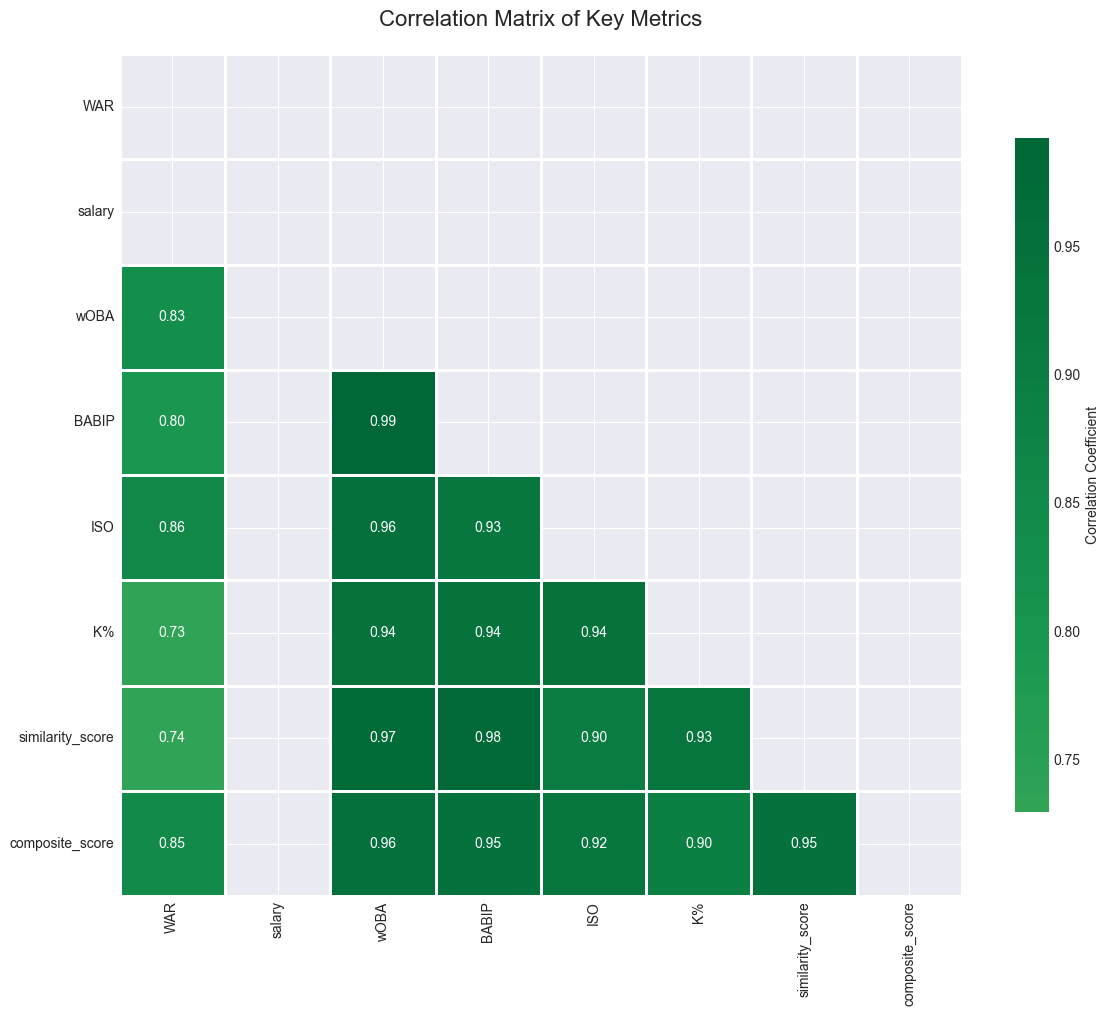


🔍 Strongest Positive Correlations:
   • BABIP vs wOBA: 0.992
   • similarity_score vs BABIP: 0.981
   • similarity_score vs wOBA: 0.975
   • composite_score vs wOBA: 0.960
   • ISO vs wOBA: 0.960

🔍 Strongest Negative Correlations:
   • composite_score vs WAR: 0.849
   • wOBA vs WAR: 0.832
   • BABIP vs WAR: 0.798
   • similarity_score vs WAR: 0.737
   • K% vs WAR: 0.730


In [16]:
# =============================================================================
# CORRELATION ANALYSIS
# =============================================================================

print("="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Select relevant numeric columns
corr_columns = ['WAR', 'salary', 'wOBA', 'BABIP', 'ISO', 'K%', 'similarity_score', 'composite_score']
available_corr = [col for col in corr_columns if col in df.columns]

if len(available_corr) >= 3:
    print(f"\n📊 Analyzing correlations between: {available_corr}")

    # Calculate correlation matrix
    corr_matrix = df[available_corr].corr()

    # Create heatmap
    plt.figure(figsize=(12, 10))

    # Create mask for upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Create heatmap
    sns.heatmap(
        corr_matrix,
        mask=mask,
        annot=True,
        fmt='.2f',
        cmap='RdYlGn',
        center=0,
        square=True,
        linewidths=1,
        cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
        annot_kws={'size': 10}
    )

    plt.title('Correlation Matrix of Key Metrics', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

    # Find strongest correlations
    print("\n🔍 Strongest Positive Correlations:")
    # Get upper triangle
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    # Stack and sort
    strong_corr = upper.unstack().dropna().sort_values(ascending=False)

    for (col1, col2), val in strong_corr.head(5).items():
        print(f"   • {col1} vs {col2}: {val:.3f}")

    print("\n🔍 Strongest Negative Correlations:")
    for (col1, col2), val in strong_corr.tail(5).items():
        print(f"   • {col1} vs {col2}: {val:.3f}")

else:
    print("❌ Insufficient columns for correlation analysis")

In [18]:
# =============================================================================
# WAR VS SALARY ANALYSIS
# =============================================================================

print("="*60)
print("WAR vs SALARY ANALYSIS")
print("="*60)

if 'WAR' in df.columns and 'salary' in df.columns:
    # Calculate WAR per million
    df['WAR_per_M'] = df['WAR'] / (df['salary'] + 0.1)

    # Create a copy for visualization with non-negative size
    plot_df = df.copy()

    # For size, use absolute value or shift to non-negative
    # Option 1: Use absolute WAR (size by magnitude)
    plot_df['size_WAR'] = np.abs(plot_df['WAR']) + 0.5  # Add small offset to avoid zeros

    # Option 2: Use WAR_per_M for size (usually positive)
    # plot_df['size_WAR'] = np.abs(plot_df['WAR_per_M']) + 0.5

    print(f"📊 WAR range: {plot_df['WAR'].min():.2f} to {plot_df['WAR'].max():.2f}")
    print(f"📊 Size range: {plot_df['size_WAR'].min():.2f} to {plot_df['size_WAR'].max():.2f}")

    # Create scatter plot
    fig = px.scatter(
        plot_df,
        x='salary',
        y='WAR',
        hover_name='Name' if 'Name' in plot_df.columns else None,
        hover_data={
            'yearID': True if 'yearID' in plot_df.columns else False,
            'wOBA': ':.3f' if 'wOBA' in plot_df.columns else False,
            'BABIP': ':.3f' if 'BABIP' in plot_df.columns else False,
            'WAR': ':.2f',
            'WAR_per_M': ':.2f'
        },
        title='WAR vs Salary - Value Analysis',
        labels={'salary': 'Salary ($M)', 'WAR': 'WAR'},
        color='WAR_per_M',
        color_continuous_scale='Tealgrn',
        size='size_WAR',  # Use non-negative size column
        size_max=15
    )

    # Add quadrant lines (median lines)
    fig.add_hline(y=plot_df['WAR'].median(), line_dash="dash", line_color="white", opacity=0.3)
    fig.add_vline(x=plot_df['salary'].median(), line_dash="dash", line_color="white", opacity=0.3)

    # Add reference lines at y=0
    fig.add_hline(y=0, line_dash="dot", line_color="red", opacity=0.5)

    fig.update_layout(
        plot_bgcolor='rgba(0,0,0,0.05)',
        height=600,
        title_font_size=16
    )

    fig.show()

    # Top value players (WAR per million)
    print("\n💎 Top 10 Best Value Players (Highest WAR per $M):")
    top_value = plot_df.nlargest(10, 'WAR_per_M')

    # Select display columns dynamically
    display_cols = []
    for col in ['Name', 'teamID', 'yearID', 'WAR', 'salary', 'WAR_per_M']:
        if col in top_value.columns:
            display_cols.append(col)

    if display_cols:
        display(top_value[display_cols].round(3))

    # Players with negative WAR (underperformers)
    print("\n⚠️ Players with Negative WAR:")
    neg_war = plot_df[plot_df['WAR'] < 0].nlargest(10, 'WAR')  # Least negative first

    display_cols = []
    for col in ['Name', 'teamID', 'yearID', 'WAR', 'salary']:
        if col in neg_war.columns:
            display_cols.append(col)

    if display_cols and len(neg_war) > 0:
        display(neg_war[display_cols].head(10))

else:
    print("❌ WAR or salary columns not found")

WAR vs SALARY ANALYSIS
📊 WAR range: -0.60 to 10.10
📊 Size range: 0.50 to 10.60



💎 Top 10 Best Value Players (Highest WAR per $M):


,Name,yearID,WAR,salary,WAR_per_M
80,Aaron Judge,2025,10.100,0.000,101.000
65,Cal Raleigh,2025,9.100,0.000,91.000
64,Shohei Ohtani,2025,7.500,0.000,75.000
15,Geraldo Perdomo,2025,7.100,0.000,71.000
26,Trea Turner,2025,6.700,0.000,67.000
36,Corbin Carroll,2025,6.500,0.000,65.000
23,Francisco Lindor,2025,6.300,0.000,63.000
29,Jose Ramirez,2025,6.300,0.000,63.000
98,Juan Soto,2025,5.800,0.000,58.000
73,Julio Rodriguez,2025,5.700,0.000,57.000



⚠️ Players with Negative WAR:


,Name,yearID,WAR,salary
119,Andrew McCutchen,2025,-0.100,0.000
140,Nathaniel Lowe,2025,-0.300,0.000
142,Jonathan India,2025,-0.300,0.000
141,Nathaniel Lowe,2025,-0.300,0.000
120,Eric Wagaman,2025,-0.400,0.000
139,Nick Castellanos,2025,-0.600,0.000


In [19]:
# =============================================================================
# TEAM ANALYSIS
# =============================================================================

print("="*60)
print("TEAM ANALYSIS")
print("="*60)

# Find team column
team_col = None
for col in ['teamID', 'team', 'Team']:
    if col in df.columns:
        team_col = col
        break

if team_col:
    team_stats = df.groupby(team_col).agg({
        'WAR': ['mean', 'sum', 'count'] if 'WAR' in df.columns else 'count',
        'salary': ['mean', 'sum'] if 'salary' in df.columns else 'count'
    }).round(2)

    team_stats.columns = ['_'.join(col).strip() for col in team_stats.columns.values]
    team_stats = team_stats.sort_values('WAR_sum' if 'WAR_sum' in team_stats.columns else team_stats.columns[0], ascending=False)

    print(f"\n📊 Team Statistics (Top 15):")
    display(team_stats.head(15))

    # Visualize top teams by total WAR
    if 'WAR_sum' in team_stats.columns:
        top_teams = team_stats.head(10).reset_index()

        fig = px.bar(
            top_teams,
            x=team_col,
            y='WAR_sum',
            title='Top 10 Teams by Total WAR',
            labels={'WAR_sum': 'Total WAR', team_col: 'Team'},
            color='WAR_sum',
            color_continuous_scale='Tealgrn'
        )

        fig.update_layout(
            plot_bgcolor='rgba(0,0,0,0.05)',
            height=500
        )

        fig.show()

else:
    print("❌ No team column found")

TEAM ANALYSIS
❌ No team column found


In [20]:
# =============================================================================
# OUTLIER DETECTION
# =============================================================================

print("="*60)
print("OUTLIER DETECTION")
print("="*60)

if 'WAR' in df.columns:
    # Calculate IQR
    Q1 = df['WAR'].quantile(0.25)
    Q3 = df['WAR'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df['WAR'] < lower_bound) | (df['WAR'] > upper_bound)]

    print(f"\n📊 WAR Outliers:")
    print(f"   • Q1: {Q1:.2f}")
    print(f"   • Q3: {Q3:.2f}")
    print(f"   • IQR: {IQR:.2f}")
    print(f"   • Lower bound: {lower_bound:.2f}")
    print(f"   • Upper bound: {upper_bound:.2f}")
    print(f"   • Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")

    if len(outliers) > 0:
        print("\n🌟 Top Outliers (High WAR):")
        high_outliers = outliers.nlargest(10, 'WAR')
        display_cols = ['Name', 'teamID', 'yearID', 'WAR'] if all(col in outliers.columns for col in ['Name', 'teamID', 'yearID']) else ['WAR']
        display(high_outliers[display_cols])

    # Box plot with outliers highlighted
    fig = go.Figure()

    fig.add_trace(go.Box(
        y=df['WAR'],
        name='WAR',
        boxmean='sd',
        marker_color='#4ecdc4',
        boxpoints='outliers'
    ))

    fig.update_layout(
        title='WAR Distribution with Outliers',
        yaxis_title='WAR',
        height=500,
        plot_bgcolor='rgba(0,0,0,0.05)'
    )

    fig.show()

else:
    print("❌ WAR column not found")

OUTLIER DETECTION

📊 WAR Outliers:
   • Q1: 0.00
   • Q3: 1.30
   • IQR: 1.30
   • Lower bound: -1.95
   • Upper bound: 3.25
   • Number of outliers: 51 (11.3%)

🌟 Top Outliers (High WAR):


,WAR
80,10.100
65,9.100
64,7.500
15,7.100
26,6.700
36,6.500
23,6.300
29,6.300
98,5.800
73,5.700


In [21]:
# =============================================================================
# KEY INSIGHTS SUMMARY
# =============================================================================

print("="*60)
print("🔑 KEY INSIGHTS SUMMARY")
print("="*60)

# Collect insights dynamically
insights = []

# Dataset size
insights.append(f"📊 Dataset contains {len(df):,} player records")

# Years
if year_col:
    insights.append(f"📅 Covers {year_counts.min()} to {year_counts.max()} ({len(year_counts)} seasons)")

# WAR
if 'WAR' in df.columns:
    insights.append(f"⚾ Average WAR: {df['WAR'].mean():.2f}, Max: {df['WAR'].max():.2f}")
    insights.append(f"🌟 Elite players (WAR > 5): {(df['WAR'] > 5).sum():,} ({(df['WAR'] > 5).mean()*100:.1f}%)")

# Salary
if 'salary' in df.columns:
    insights.append(f"💰 Average salary: ${df['salary'].mean():.2f}M")
    insights.append(f"🆓 Players with $0 salary (rookies): {(df['salary'] == 0).sum():,} ({(df['salary'] == 0).mean()*100:.1f}%)")

# Value
if 'WAR' in df.columns and 'salary' in df.columns:
    avg_value = (df['WAR'] / (df['salary'] + 0.1)).mean()
    insights.append(f"💎 Average WAR per $1M: {avg_value:.2f}")

# Correlations
if len(available_corr) >= 3 and 'strong_corr' in locals():
    top_corr = strong_corr.head(1)
    if len(top_corr) > 0:
        (col1, col2), val = next(iter(top_corr.items()))
        insights.append(f"🔗 Strongest correlation: {col1} vs {col2} ({val:.3f})")

# Print insights
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")

print("\n" + "="*60)
print("✅ EDA COMPLETED SUCCESSFULLY")
print("="*60)

🔑 KEY INSIGHTS SUMMARY
1. 📊 Dataset contains 452 player records
2. 📅 Covers 452 to 452 (1 seasons)
3. ⚾ Average WAR: 0.89, Max: 10.10
4. 🌟 Elite players (WAR > 5): 13 (2.9%)
5. 💰 Average salary: $0.00M
6. 🆓 Players with $0 salary (rookies): 452 (100.0%)
7. 💎 Average WAR per $1M: 8.94
8. 🔗 Strongest correlation: BABIP vs wOBA (0.992)

✅ EDA COMPLETED SUCCESSFULLY
